# Projet_Covid

In [1]:
import pandas as pd

url = "https://static.data.gouv.fr/resources/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/20230630-155909/table-indicateurs-open-data-dep-2023-06-30-17h59.csv"
df = pd.read_csv(url, sep=",")
df.head()

C:\Users\gerau\AppData\Local\Temp\ipykernel_4220\3518986916.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=",")


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,1,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.062612,NaN,2,...,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.132379,NaN,2,...,0,79,1.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN
2,1,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.155635,NaN,2,...,0,87,0.0,0.0,1.0,0.0,16.0,NaN,NaN,NaN
3,1,2020-03-21,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.173524,NaN,4,...,0,88,3.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN
4,1,2020-03-22,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.212880,NaN,8,...,0,106,3.0,1.0,1.0,0.0,25.0,NaN,NaN,NaN


# Nettoyage des données

In [2]:
import datetime as dt

print("\n Before transformations:\n")
print(df.dtypes)

if(df.date.dtype == 'object'):
    transfo_date = lambda x : dt.datetime.strptime(x, "%Y-%m-%d")
    df.date = df['date'].apply(transfo_date)

if(df.lib_dep.dtype == 'object'):
    df.lib_dep = df.lib_dep.astype('string')
if(df.lib_reg.dtype == 'object'):
    df.lib_reg = df.lib_reg.astype('string')

print("\n After transformations:\n")
print(df.dtypes)



 Before transformations:

dep               object
date              object
reg                int64
lib_dep           object
lib_reg           object
tx_pos           float64
tx_incid         float64
TO               float64
R                float64
hosp               int64
rea                int64
rad                int64
dchosp             int64
reg_rea            int64
incid_hosp       float64
incid_rea        float64
incid_rad        float64
incid_dchosp     float64
reg_incid_rea    float64
pos              float64
pos_7j           float64
cv_dose1         float64
dtype: object

 After transformations:

dep                      object
date             datetime64[ns]
reg                       int64
lib_dep          string[python]
lib_reg          string[python]
tx_pos                  float64
tx_incid                float64
TO                      float64
R                       float64
hosp                      int64
rea                       int64
rad                       int64

# KPI (Infos générale)

### Bilan Humain Total 
Analyse du nombre de décès total en france

In [3]:
total_death = df.dchosp.sum()
print(f"\n Nombre total de décès en france suite au COVID-19 : {total_death}\n")


 Nombre total de décès en france suite au COVID-19 : 103245818



### Pic d'hospitalisation
Record du nombre d'hospitalisation dû au COVID-19

In [4]:
max_infected = df.hosp.max()
date_max_infected = df.loc[df.hosp.idxmax(), 'date'].date()
print(f"\n À la date du {date_max_infected}, il y a eu le plus d'hospitalisation avec un nombre de {max_infected} cas.\n")


 À la date du 2020-04-14, il y a eu le plus d'hospitalisation avec un nombre de 3281 cas.



### Dépistage : taux de positivité
Taux moyen d'un dépistage positive sur la période du COVID

In [5]:
positive_avg = df.pos.mean()

print(f"\n Le nombre moyen de cas positifs par jour en France est de {positive_avg:.2f} cas.\n")


 Le nombre moyen de cas positifs par jour en France est de 335.42 cas.



# Graphiques des critères

In [28]:
import matplotlib.pyplot as plt

dates = df['date'].unique()
len(dates)
df['day_of_week'] = df['date'].dt.day_name()
day_mapping = {
    'Monday': 'Lundi',
    'Tuesday': 'Mardi',
    'Wednesday': 'Mercredi',
    'Thursday': 'Jeudi',
    'Friday': 'Vendredi',
    'Saturday': 'Samedi',
    'Sunday': 'Dimanche'
}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

### Graphe de la saturation

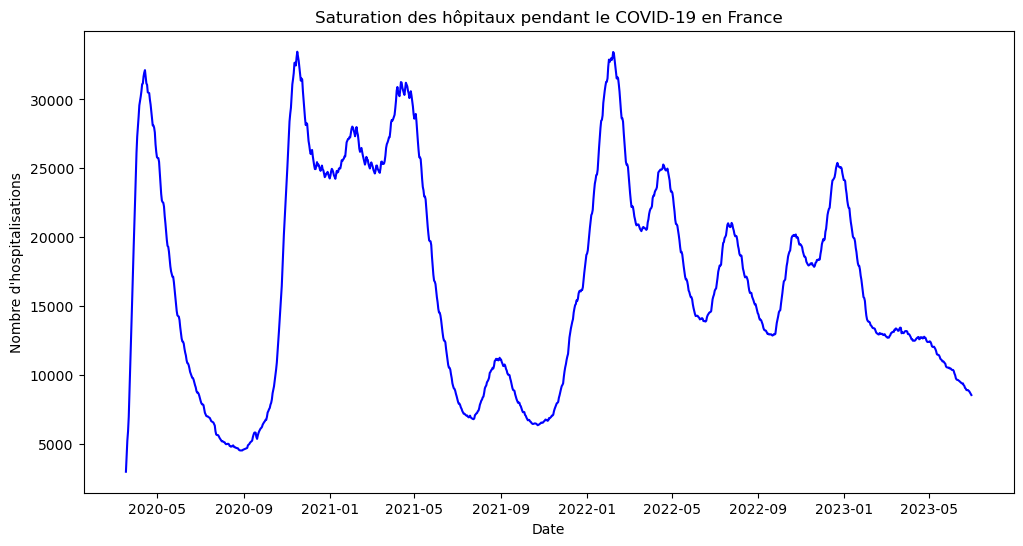

In [7]:
# Adapter les données pour lisibilité
hospitalisations = df.groupby('date')['hosp'].apply(lambda x : x.sum()).values

plt.figure(figsize=(12, 6))
plt.title("Saturation des hôpitaux pendant le COVID-19 en France")
plt.xlabel("Date")
plt.ylabel("Nombre d'hospitalisations")
plt.plot(dates, hospitalisations, label='Hospitalisations', color='blue')
plt.show()

### Répartition journalière
Analyse des cas par rapport au jour de la semaine

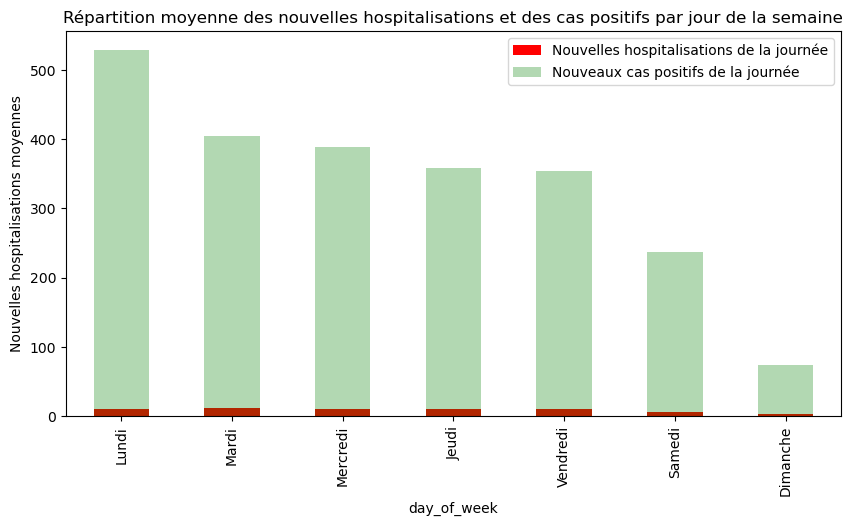

In [29]:
# Répartition par jour de la semaine des nouvelles hospitalisations
from hmac import new

new_hosp_by_day = df.groupby('day_of_week')['incid_hosp'].mean()
new_infect_by_day = df.groupby('day_of_week')['pos'].mean()
days_order = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
new_hosp_by_day = new_hosp_by_day.reindex(days_order)
new_infect_by_day = new_infect_by_day.reindex(days_order)
plt.figure(figsize=(10, 5))
plt.title("Répartition moyenne des nouvelles hospitalisations et des cas positifs par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nouvelles hospitalisations moyennes")
new_hosp_by_day.plot(kind='bar', color='red')
new_infect_by_day.plot(kind='bar', color='green', alpha=0.3)
plt.legend(["Nouvelles hospitalisations de la journée", "Nouveaux cas positifs de la journée"])
plt.show()

# Carte de distribution